# • Business Data Analytics '__Project__':

# BY:
## • Abdel-Rahman Abuhani __(2132462)__
## • Belal khaled __(2136873)__

# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • Importing All Libraries We Need:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • __Step 1: Data Acquisition__
##   ○ Reading Our Dataset:

In [3]:
dataset = pd.read_csv('shopping_trends_updated.csv')
dataset

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


## ○ Display The First 5 Rows Of The Dataset:

In [4]:
dataset.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • __Step 2: Data Cleaning__

## ○ Dataset info:
## ○ 3900 rows and 18 coulmns.

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
dataset.describe(include=object)

,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


## ○ Check for missing values:

In [7]:
null_counts = dataset.isnull().sum()
null_counts

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

## ○ Check for duplicates:

In [8]:
duplicates = dataset.duplicated().sum()
duplicates

0

# ◘ We have (0) Missing values and (0) Duplicates.

# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • __Step 3: Exploratory Analysis__
## ○ Basic statistics:

In [9]:
summary_stats = dataset.describe()
summary_stats

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## ○ Plot distribution of purchase amounts:

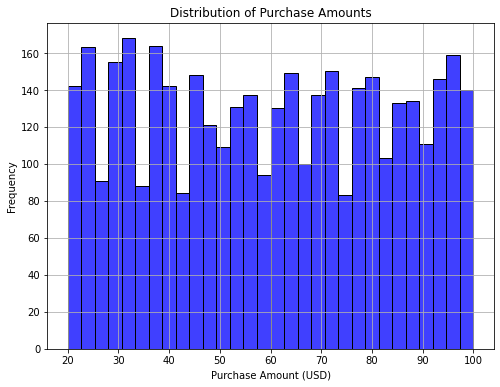

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Purchase Amount (USD)'], bins=30, color='blue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## ○ Plot distribution of Purchase Amount Distribution by Category:

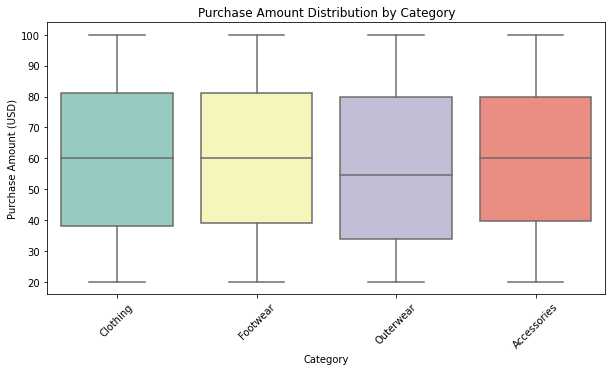

In [37]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataset, x='Category', y='Purchase Amount (USD)', palette='Set3')
plt.title('Purchase Amount Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

## ○ Plot distribution of previous purchases:

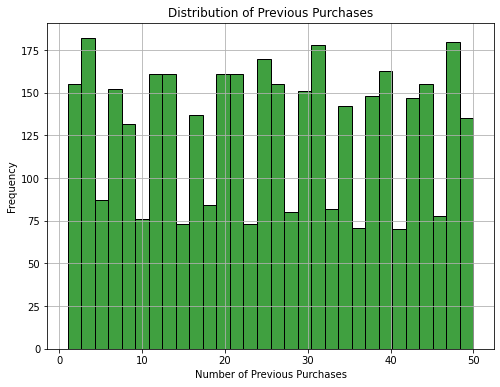

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['Previous Purchases'], bins=30, color='green')
plt.title('Distribution of Previous Purchases')
plt.xlabel('Number of Previous Purchases')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## ○ Count plot for gender distribution:

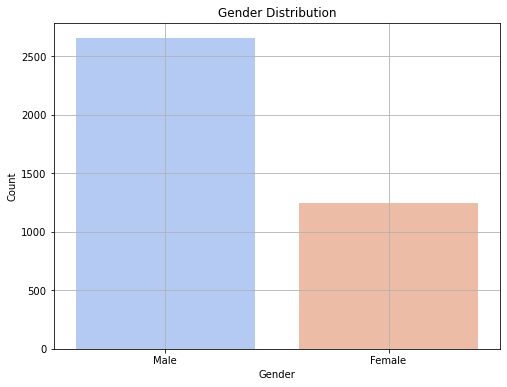

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=dataset, palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.show()

## ○ Count plot for Frequency of Purchases by Subscription Status distribution:

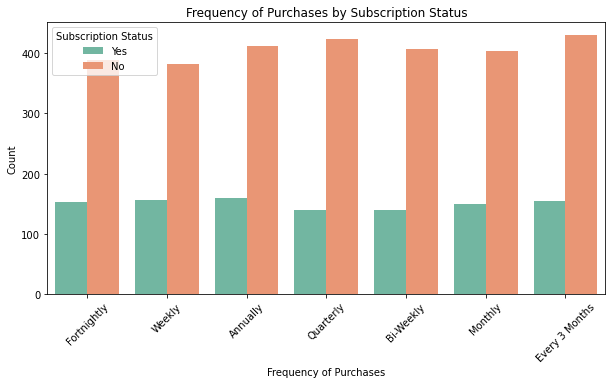

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x='Frequency of Purchases', hue='Subscription Status', palette='Set2')
plt.title('Frequency of Purchases by Subscription Status')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## ○ Count plot for top categories:

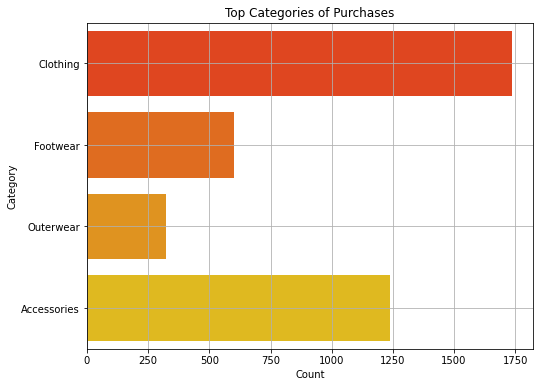

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Category', data=dataset, palette='autumn')
plt.title('Top Categories of Purchases')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(True)
plt.show()

## ○ Pie-Chart for gender distribution:

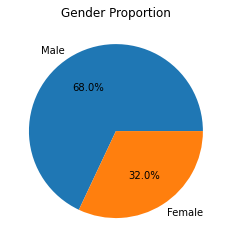

In [32]:
gender_counts = dataset['Gender'].value_counts()
gender_proportions = dataset['Gender'].value_counts(normalize=True)
gender_proportions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Proportion')
plt.ylabel('')
plt.show()

## ○ Correlation matrix:

In [16]:
correlation_matrix = dataset.corr()
correlation_matrix

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Customer ID,1.000000,-0.004079,0.011048,0.001343,-0.039159
Age,-0.004079,1.000000,-0.010424,-0.021949,0.040445
Purchase Amount (USD),0.011048,-0.010424,1.000000,0.030776,0.008063
Review Rating,0.001343,-0.021949,0.030776,1.000000,0.004229
Previous Purchases,-0.039159,0.040445,0.008063,0.004229,1.000000


## ○ Heatmap of the correlation matrix:

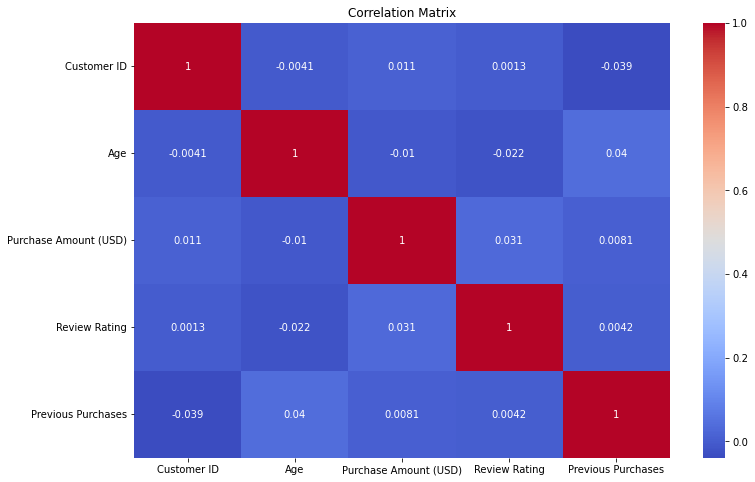

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • __Step 4: Analysis Model__
## ○ Preparing data for modeling, __One-hot encode categorical variables:__

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

# ○ One-hot encode categorical variables:

In [19]:
encoder = OneHotEncoder(sparse_output=False)
categorical_columns = ['Gender', 'Category', 'Location', 'Season', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Payment Method', 'Frequency of Purchases']
encoded_data = encoder.fit_transform(dataset[categorical_columns])

## ○ Create a DataFrame from the encoded data:

In [20]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
encoded_df.head()

,Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Location_Alabama,Location_Alaska,Location_Arizona,Location_Arkansas,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## ○ Combine the encoded DF with the continuous variables:

In [21]:
model_data = pd.concat([dataset[['Age', 'Previous Purchases', 'Purchase Amount (USD)']], encoded_df], axis=1)
model_data.head()

,Age,Previous Purchases,Purchase Amount (USD),Gender_Female,Gender_Male,Category_Accessories,Category_Clothing,Category_Footwear,Category_Outerwear,Location_Alabama,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,14,53,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19,2,64,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,50,23,73,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21,49,90,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,31,49,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## ○ Define features and target:

In [22]:
X = model_data.drop('Purchase Amount (USD)', axis=1)
y = model_data['Purchase Amount (USD)']

## ○ Split the data into training and testing sets:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## ○ Create a linear regression model:

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## ○ Predict on the testing set:

In [26]:
y_pred = model.predict(X_test)

## ○ Calculate the mean squared error of the model:

In [27]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 570.4286629823538


## ○ Calculate the R-squared of the model:

In [28]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: -0.0193828321515781


# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ

# • __Step 5: Visualization__
## ○ Visualization of Actual vs Predicted Purchase Amounts:

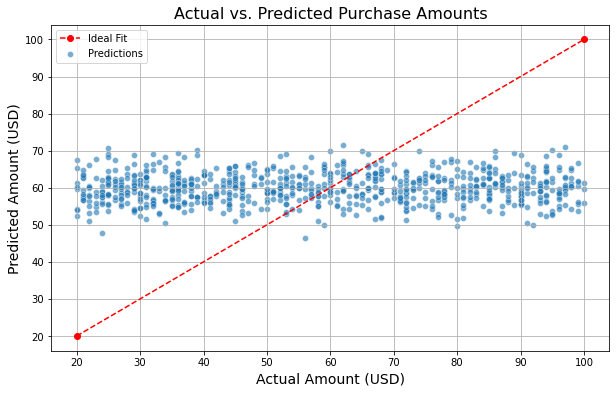

In [29]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', marker='o', label='Ideal Fit')
plt.title('Actual vs. Predicted Purchase Amounts', fontsize=16)
plt.xlabel('Actual Amount (USD)', fontsize=14)
plt.ylabel('Predicted Amount (USD)', fontsize=14)
plt.legend(loc='best')
plt.grid(True)
plt.show()

# ــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــــ